In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,f1_score,recall_score ,precision_score,roc_curve,confusion_matrix

from mlxtend.plotting import plot_confusion_matrix

import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Employee.csv")

In [3]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


# EDA

In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
df.shape

(4653, 9)

In [6]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [8]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# Categorical Features

In [9]:
labelencoder = preprocessing.LabelEncoder()
df['Education'] = labelencoder.fit_transform(df['Education'])
df['City'] = labelencoder.fit_transform(df['City'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['EverBenched'] = labelencoder.fit_transform(df['EverBenched'])

<AxesSubplot:>

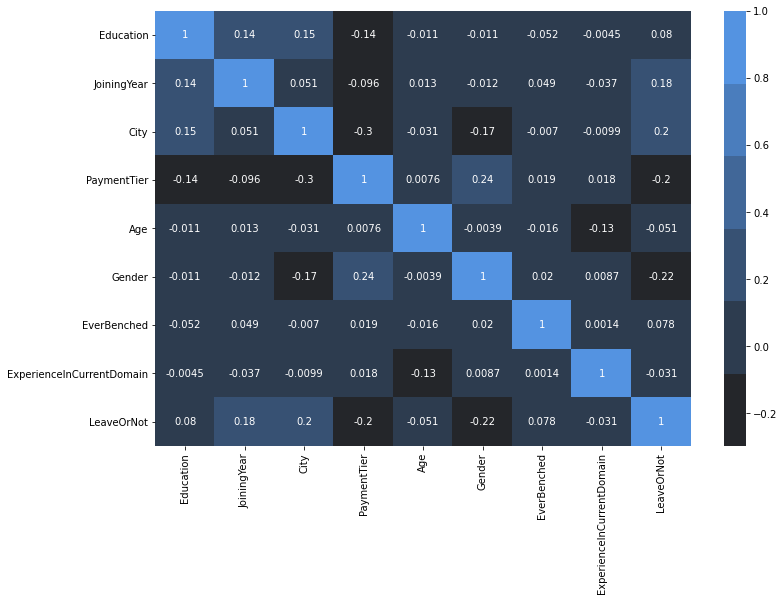

In [10]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr() , annot=True,cmap=sns.dark_palette((250, 75, 60), input="husl"))

## Data visualization

<AxesSubplot:>

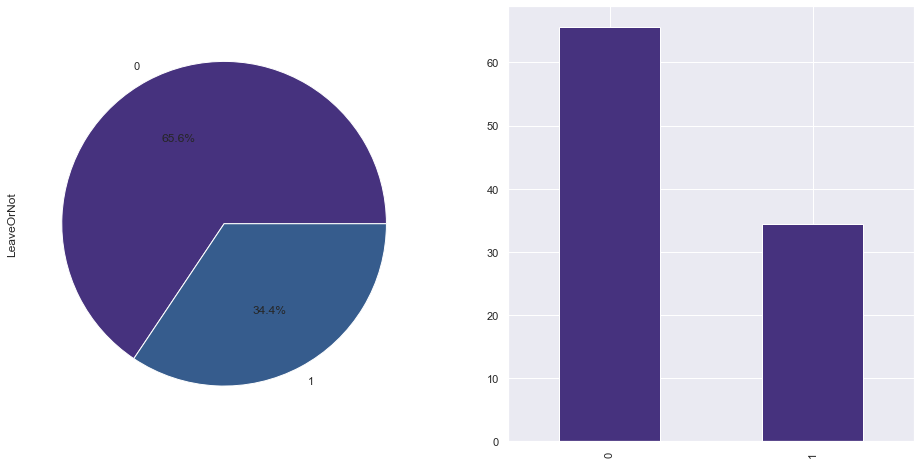

In [11]:
sns.set_theme(palette="viridis")
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
(df['LeaveOrNot'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', ax=axs[0])
(df['LeaveOrNot'].value_counts(normalize=True)*100).plot.bar(ax=axs[1])

### 0 refers that more than 65% of employee won't leave in 2 years 
### 1 refers that more thatn 34% of employee will leave in 2 years

<AxesSubplot:ylabel='None'>

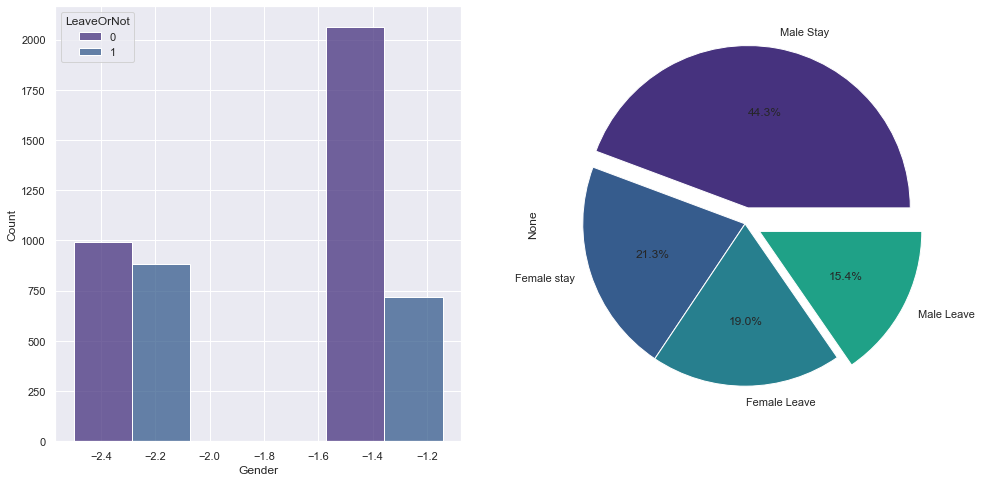

In [12]:
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
explode = [0.1,0.0,0.0,0.1]
labels = ["Male Stay", "Female stay", "Female Leave", "Male Leave"]
sns.histplot(data=df, x="Gender", hue="LeaveOrNot", multiple="dodge", shrink=6, ax=axs[0])
(df[['Gender','LeaveOrNot']].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', ax=axs[1] ,explode=explode, labels=labels)

## the male employees have the highest rate who won't leave the company (male) with 44% and also have the lowest rate who will leave the company( male) with 15% and the female employees who will leave with 19% and who won't leave with 21%

<AxesSubplot:xlabel='Age', ylabel='Count'>

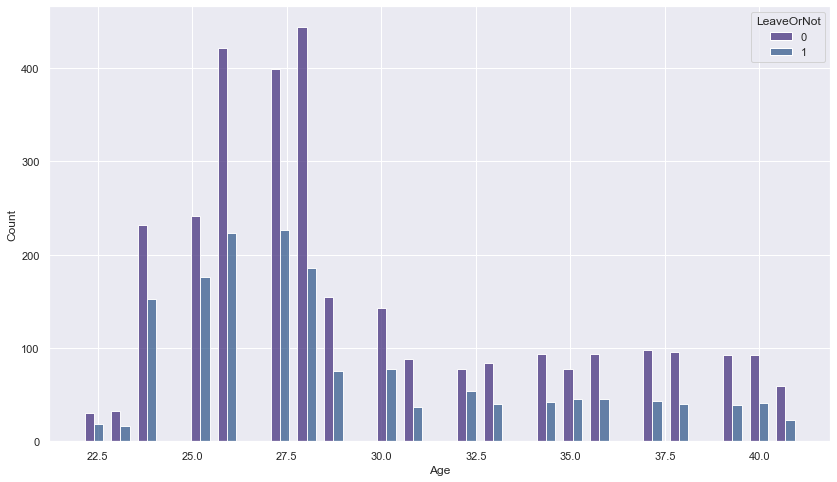

In [13]:
fig, axs= plt.subplots(figsize=(14, 8))
sns.histplot(data=df, x="Age", hue="LeaveOrNot", multiple="dodge", shrink=.7)

### employees with the age 28 said they will leave and won't leave with the highest level than the other ages 

<AxesSubplot:ylabel='None'>

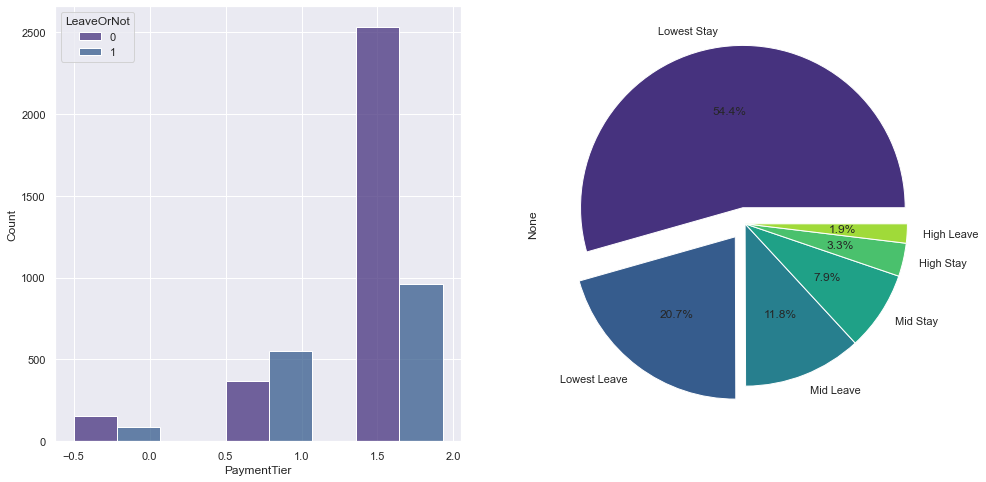

In [14]:
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
explode = [0.1,0.1,0.0,0.0,0.0,0.0]
labels = ["Lowest Stay", "Lowest Leave", "Mid Leave", "Mid Stay" , "High Stay" , "High Leave"]
sns.histplot(data=df, x="PaymentTier", hue="LeaveOrNot", multiple="dodge", shrink=4, ax=axs[0])
(df[['PaymentTier','LeaveOrNot']].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', ax=axs[1] ,explode=explode , labels = labels)

#  The type of  payment tier 
## -1: HIGHEST 
## -2: MID LEVEL 
## -3:LOWEST
### the employees who said that they won't leave thier tier payment is the lowest than others with 54% and also the employees who said they will leave their tier payment is the lowest than others 20%

<AxesSubplot:ylabel='None'>

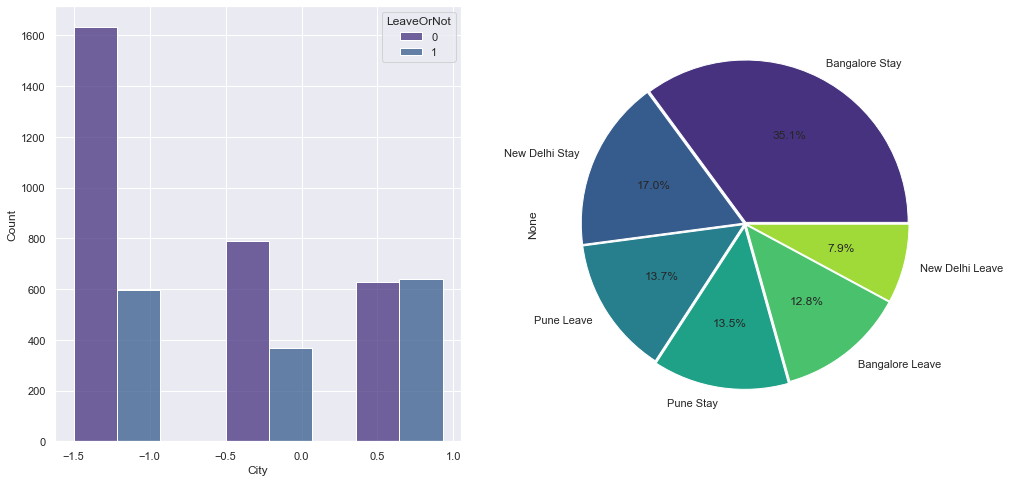

In [15]:
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
explode = [0.01,0.01,0.01,0.02,0.01,0.01]
labels = ["Bangalore Stay", "New Delhi Stay", "Pune Leave", "Pune Stay" , "Bangalore Leave" , "New Delhi Leave"]
sns.histplot(data=df, x="City", hue="LeaveOrNot", multiple="dodge", shrink=4, ax=axs[0])
(df[['City','LeaveOrNot']].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', ax=axs[1] ,explode=explode , labels=labels)

### Bangalore is the city with the highest rate where employees said they won't leave the company with 35%
### and New Delhi is the city where employees said the will leave but with the lowest rate than other cities
### pune city have approx the same rate in leaving and stying

<AxesSubplot:ylabel='None'>

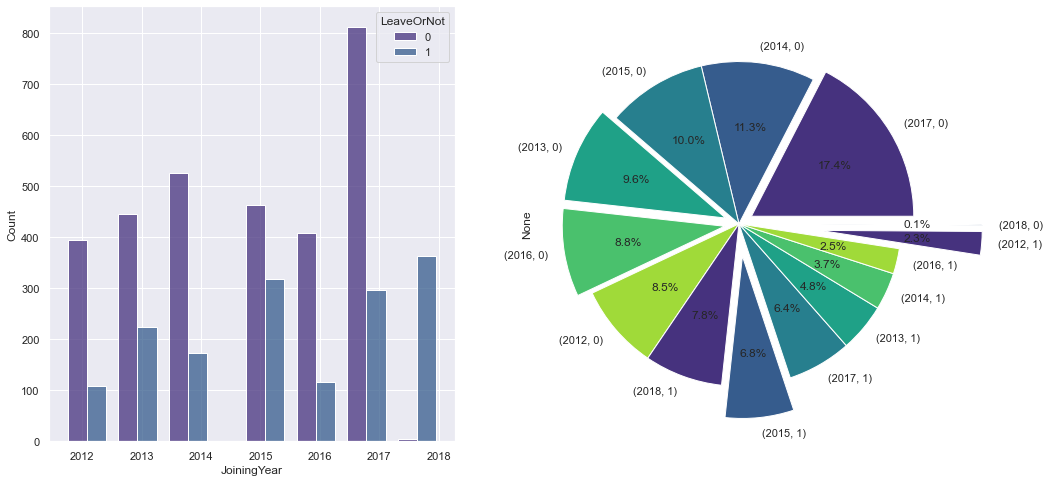

In [16]:
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
explode = [0.09,0.0,0.0,0.09,0.09,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.5,.5]
sns.histplot(data=df, x="JoiningYear", hue="LeaveOrNot", multiple="dodge", shrink=1.5, ax=axs[0])
(df[['JoiningYear','LeaveOrNot']].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', ax=axs[1] ,explode=explode)

### we can notice that 2017 is year when the employee with more than 17% said that they won't leave 
###  and 2018 is the year where employees said that they won't leave but with the lowest rate than others with 0.1%which means that the employees who said in 2017 that they won't leave left!!
### and 2012 is the year when emplyees said they will leave but with the lowest rate than others with  8%
### 2018 is the year when emplyees said they will leave but with the highest rate than others with  7.8% 
### also we can see that the number of emplyess who said they won't leave in 2018 highly decreased than 2017 

<AxesSubplot:ylabel='None'>

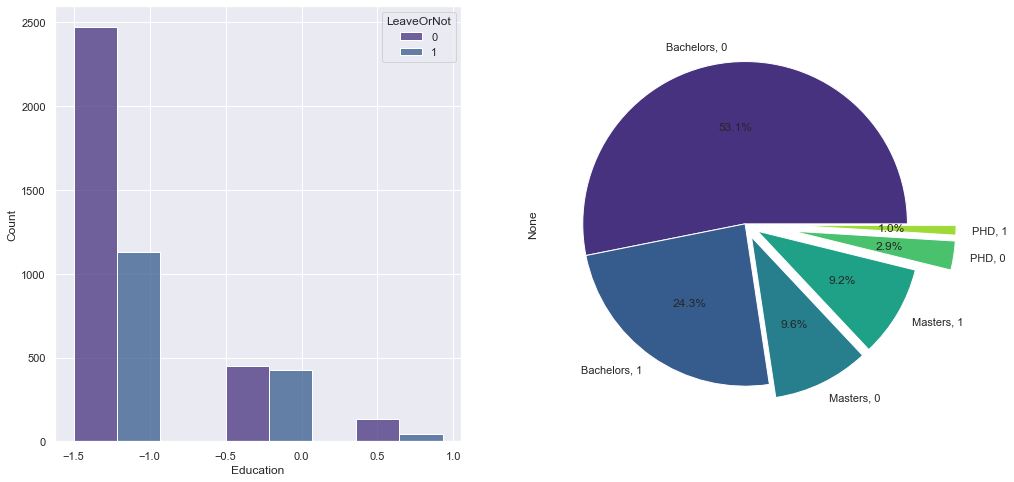

In [17]:
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
explode = [0.0,0.0,0.09,0.09,0.3,0.3]
labels = ["Bachelors, 0", "Bachelors, 1", "Masters, 0", "Masters, 1" , "PHD, 0" , "PHD, 1"]
sns.histplot(data=df, x="Education", hue="LeaveOrNot", multiple="dodge", shrink=4, ax=axs[0])
(df[['Education','LeaveOrNot']].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', ax=axs[1] ,explode=explode , labels = labels)

### the most employees have bachelors with  and more than 53% won't leave and 24% will leave 
### then more than 9 % have masters won't leave and 9 will leave 
### then with the lowest rate approx 3% of employees have PHD and won't leave and  1% will leave 

<AxesSubplot:ylabel='None'>

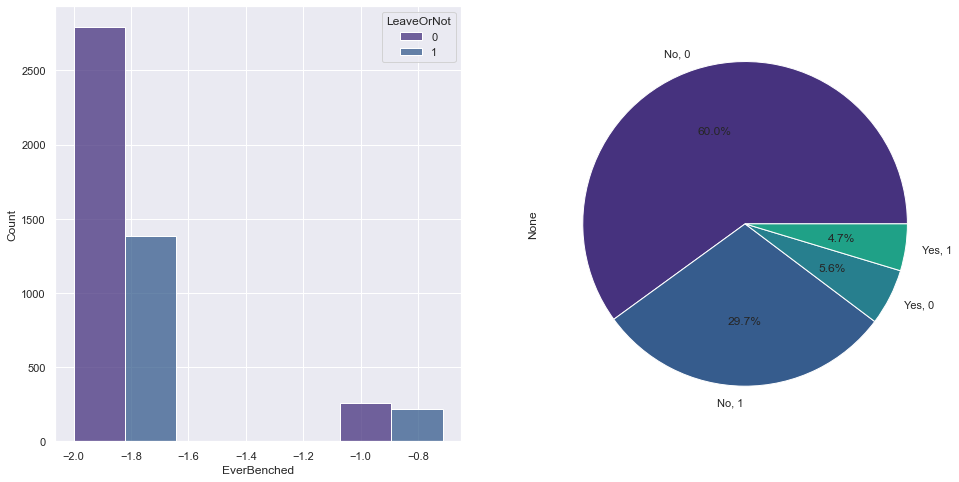

In [18]:
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
labels = ["No, 0", "No, 1", "Yes, 0", "Yes, 1"]
sns.histplot(data=df, x="EverBenched", hue="LeaveOrNot", multiple="dodge", shrink=5, ax=axs[0])
(df[['EverBenched','LeaveOrNot']].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', ax=axs[1] , labels = labels)

## it means ever kept out of the projects for 1 month or more
### the people who haven't kept out of the projects for month or more have the highest rate in leaving with 29% and staying with 60%

## Normalization and Train-Test-split

In [19]:
sc= MinMaxScaler()
X =pd.DataFrame(sc.fit_transform(df.drop(["LeaveOrNot"],axis = 1)))
Y = df['LeaveOrNot'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2 , random_state=42)

# Modeling

##  1-LGBMClassifier

F1-Score: 0.794425087108014
Accuracy: 0.8732545649838883
Precision: 0.9011857707509882
Recall: 0.7102803738317757
AUC: 0.8346483836371993
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       610
           1       0.90      0.71      0.79       321

    accuracy                           0.87       931
   macro avg       0.88      0.83      0.85       931
weighted avg       0.88      0.87      0.87       931



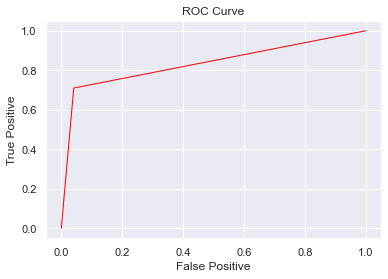

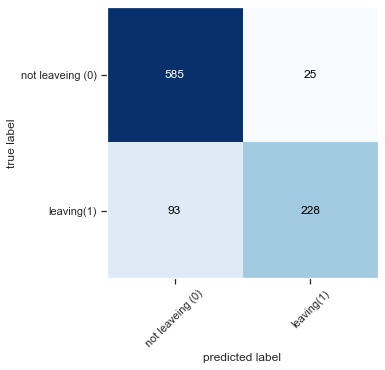

In [20]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)
Y_pred_test = clf.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_test))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_test))
print("Precision:",metrics.precision_score(Y_test, Y_pred_test))
print("Recall:",metrics.recall_score(Y_test, Y_pred_test))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_test))
print(classification_report(Y_test, Y_pred_test))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_test,pos_label=1)
confusion_matrix=confusion_matrix(Y_test,Y_pred_test)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plot_confusion_matrix(confusion_matrix,class_names=["not leaveing (0)","leaving(1)"],figsize=(12,5))
plt.show()

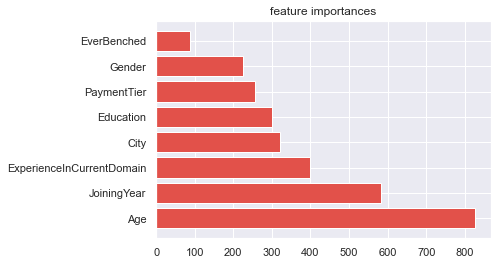

In [21]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain']
sns.set_theme(palette="Spectral")
f_importances(abs(clf.feature_importances_), features_names, top=8)

## in LGBMClassifier the best features for prediction is:
### 1- Age
### 2- Joining Year
### 3- Experience
### 4- City
### 5- Education
### 6- Payment Tier
### 7- Gender
### 8- Benching

## 2-KNeighborsClassifier

F1-Score: 0.6956521739130433
Accuracy: 0.8270676691729323
Precision: 0.8846153846153846
Recall: 0.573208722741433
AUC: 0.7669322302231757
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       610
           1       0.88      0.57      0.70       321

    accuracy                           0.83       931
   macro avg       0.85      0.77      0.79       931
weighted avg       0.84      0.83      0.82       931



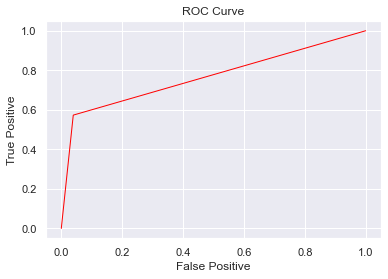

In [22]:
K=KNeighborsClassifier(n_neighbors=10)
K.fit(X_train, Y_train)
Y_pred_k = K.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_k))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_k))
print("Precision:",metrics.precision_score(Y_test, Y_pred_k))
print("Recall:",metrics.recall_score(Y_test, Y_pred_k))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_k))
print(classification_report(Y_test, Y_pred_k))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_k,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

## 3-DecisionTreeClassifier

F1-Score: 0.7755102040816326
Accuracy: 0.8582169709989259
Precision: 0.8539325842696629
Recall: 0.7102803738317757
AUC: 0.8231729738011337
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       610
           1       0.85      0.71      0.78       321

    accuracy                           0.86       931
   macro avg       0.86      0.82      0.84       931
weighted avg       0.86      0.86      0.85       931



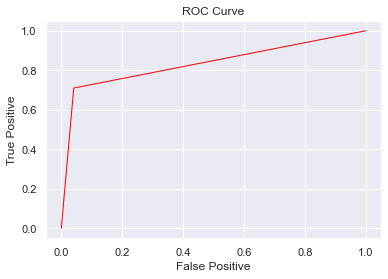

In [23]:
D=DecisionTreeClassifier(max_depth=8,max_features=8,random_state=42)
D.fit(X_train, Y_train)
Y_pred_d = D.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_d))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_d))
print("Precision:",metrics.precision_score(Y_test, Y_pred_d))
print("Recall:",metrics.recall_score(Y_test, Y_pred_d))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_d))
print(classification_report(Y_test, Y_pred_d))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_test,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

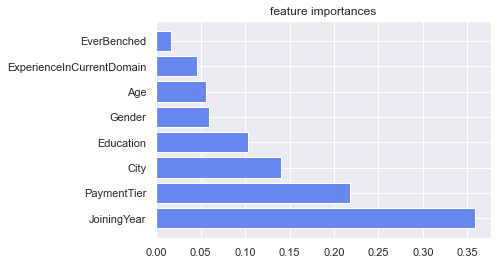

In [24]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain']
sns.set_theme(palette="coolwarm")
f_importances(abs(D.feature_importances_), features_names, top=8)

## in DecisionTreeClassifier the best features for prediction is:
### 1- Joining Year
### 2- Payment Tier
### 3- City
### 4- Education
### 5- Gender
### 6- Age
### 7- Experience
### 8- Benching

## 4-RandomForestClassifier

F1-Score: 0.7832167832167832
Accuracy: 0.8668098818474759
Precision: 0.8924302788844621
Recall: 0.6978193146417445
AUC: 0.8267785097798886
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       610
           1       0.89      0.70      0.78       321

    accuracy                           0.87       931
   macro avg       0.87      0.83      0.84       931
weighted avg       0.87      0.87      0.86       931



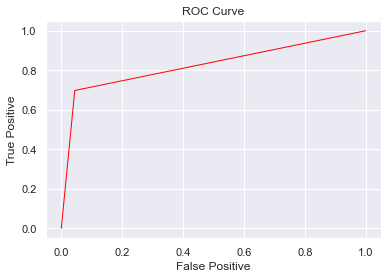

In [25]:
R=RandomForestClassifier(n_estimators=5,max_depth=8,max_features=8,random_state=42)
R.fit(X_train, Y_train)
Y_pred_r = R.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_r))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_r))
print("Precision:",metrics.precision_score(Y_test, Y_pred_r))
print("Recall:",metrics.recall_score(Y_test, Y_pred_r))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_r))
print(classification_report(Y_test, Y_pred_r))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_r,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

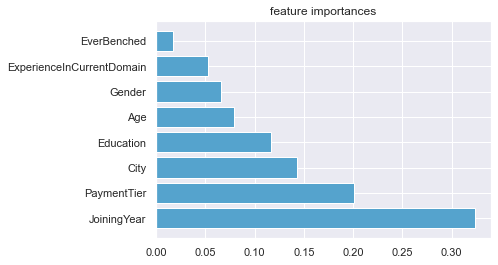

In [26]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain']
sns.set_theme(palette="icefire")
f_importances(abs(R.feature_importances_), features_names, top=8)

## in RandomForestClassifier the best features for prediction is:
### 1- Joining Year
### 2- Payment Tier
### 3- City
### 4- Education
### 5- Age
### 6- Gender
### 7- Experience
### 8- Benching

## 5-GradientBoostingClassifier

F1-Score: 0.7789473684210526
Accuracy: 0.8646616541353384
Precision: 0.891566265060241
Recall: 0.6915887850467289
AUC: 0.8236632449823809
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       610
           1       0.89      0.69      0.78       321

    accuracy                           0.86       931
   macro avg       0.87      0.82      0.84       931
weighted avg       0.87      0.86      0.86       931



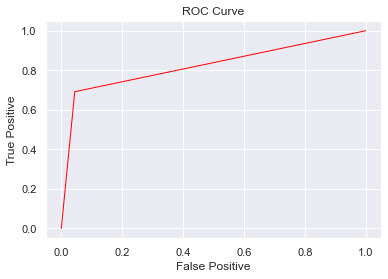

In [27]:
G=GradientBoostingClassifier(n_estimators =5, max_depth =7, learning_rate = 0.3, max_features=7,random_state=42 )
G.fit(X_train, Y_train)
Y_pred_g = G.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_g))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_g))
print("Precision:",metrics.precision_score(Y_test, Y_pred_g))
print("Recall:",metrics.recall_score(Y_test, Y_pred_g))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_g))
print(classification_report(Y_test, Y_pred_g))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_g,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

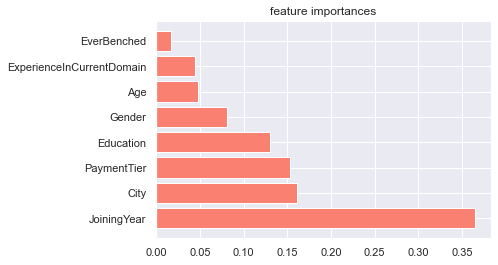

In [28]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()
    
features_names = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain']
sns.set_theme(palette="dark:salmon_r")
f_importances(abs(G.feature_importances_), features_names, top=8)

## in GradientBoostingClassifier the best features for prediction is:
### 1- Joining Year
### 2- City
### 3- Payment Tier
### 4- Education
### 5- Gender
### 6- Age
### 7- Experience
### 8- Benching

## 6-Support Vector Machine

F1-Score: 0.7686703096539161
Accuracy: 0.8635875402792696
Precision: 0.9254385964912281
Recall: 0.6573208722741433
AUC: 0.8147260099075634
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       610
           1       0.93      0.66      0.77       321

    accuracy                           0.86       931
   macro avg       0.88      0.81      0.84       931
weighted avg       0.87      0.86      0.86       931



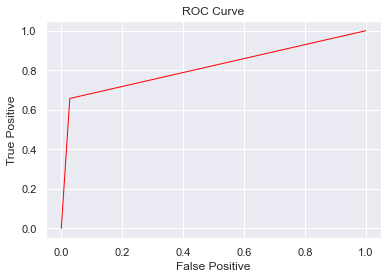

In [29]:
rbf = svm.SVC(kernel='rbf', gamma=4,C=2).fit(X_train,Y_train)
rbf.fit(X_train, Y_train)
Y_pred_rbf = rbf.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_rbf))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_rbf))
print("Precision:",metrics.precision_score(Y_test, Y_pred_rbf))
print("Recall:",metrics.recall_score(Y_test, Y_pred_rbf))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_rbf))
print(classification_report(Y_test, Y_pred_rbf))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_rbf,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

## 7-ExtraTreesClassifier

F1-Score: 0.7654320987654321
Accuracy: 0.8571428571428571
Precision: 0.8821138211382114
Recall: 0.67601246105919
AUC: 0.8142357387263163
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       610
           1       0.88      0.68      0.77       321

    accuracy                           0.86       931
   macro avg       0.87      0.81      0.83       931
weighted avg       0.86      0.86      0.85       931



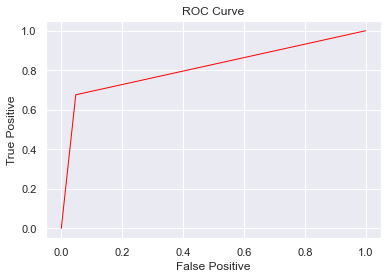

In [30]:
E = ExtraTreesClassifier(n_estimators=6,min_samples_split=10, random_state=0)
E.fit(X_train, Y_train)
Y_pred_e = E.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_e))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_e))
print("Precision:",metrics.precision_score(Y_test, Y_pred_e))
print("Recall:",metrics.recall_score(Y_test, Y_pred_e))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_e))
print(classification_report(Y_test, Y_pred_e))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_e,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

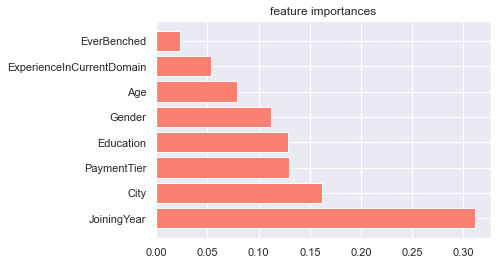

In [31]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain']
    
f_importances(abs(E.feature_importances_), features_names, top=8)

## in ExtraTreesClassifier the best features for prediction is:
### 1- Joining Year
### 2- City
### 3- Payment Tier
### 4- Education
### 5- Gender
### 6- Age
### 7- Experience
### 8- Benching

## 8-LogisticRegression

F1-Score: 0.48648648648648646
Accuracy: 0.7142857142857143
Precision: 0.6395939086294417
Recall: 0.3925233644859813
AUC: 0.6380649609315152
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       610
           1       0.64      0.39      0.49       321

    accuracy                           0.71       931
   macro avg       0.69      0.64      0.64       931
weighted avg       0.70      0.71      0.69       931



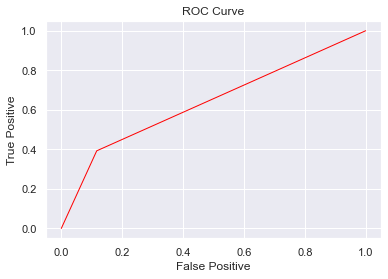

In [32]:
L=LogisticRegression()
L.fit(X_train, Y_train)
Y_pred_l = L.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_l))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_l))
print("Precision:",metrics.precision_score(Y_test, Y_pred_l))
print("Recall:",metrics.recall_score(Y_test, Y_pred_l))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_l))
print(classification_report(Y_test, Y_pred_l))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_l,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

## 9-AdaBoostClassifier

F1-Score: 0.6234817813765182
Accuracy: 0.8002148227712137
Precision: 0.8901734104046243
Recall: 0.4797507788161994
AUC: 0.7243016189162964
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       610
           1       0.89      0.48      0.62       321

    accuracy                           0.80       931
   macro avg       0.83      0.72      0.74       931
weighted avg       0.82      0.80      0.78       931



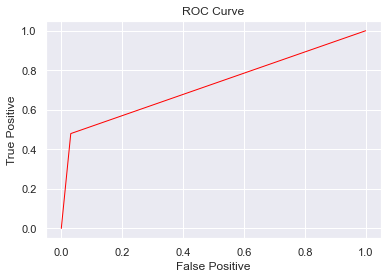

In [33]:
A=AdaBoostClassifier(n_estimators=5,learning_rate=.5)
A.fit(X_train, Y_train)
Y_pred_a = A.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_a))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_a))
print("Precision:",metrics.precision_score(Y_test, Y_pred_a))
print("Recall:",metrics.recall_score(Y_test, Y_pred_a))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_a))
print(classification_report(Y_test, Y_pred_a))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_a,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

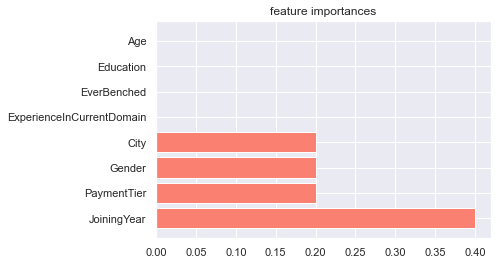

In [34]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()
features_names = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
  
                  'EverBenched', 'ExperienceInCurrentDomain']
f_importances(abs(A.feature_importances_), features_names, top=8)

## in AdaBoostClassifier the best features for prediction is:
### 1- Joining Year
### 2- Payment Tier , Gender , City

## 10-GaussianNB

F1-Score: 0.4991452991452991
Accuracy: 0.6852846401718582
Precision: 0.553030303030303
Recall: 0.45482866043613707
AUC: 0.6306930187426587
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       610
           1       0.55      0.45      0.50       321

    accuracy                           0.69       931
   macro avg       0.65      0.63      0.63       931
weighted avg       0.67      0.69      0.68       931



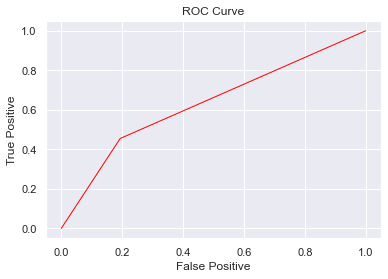

In [35]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
Y_pred_gnb =GNB.predict(X_test)
print("F1-Score:",metrics.f1_score(Y_test, Y_pred_gnb))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_gnb))
print("Precision:",metrics.precision_score(Y_test, Y_pred_gnb))
print("Recall:",metrics.recall_score(Y_test, Y_pred_gnb))
print("AUC:",metrics.roc_auc_score(Y_test, Y_pred_gnb))
print(classification_report(Y_test, Y_pred_gnb))
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []
FPR = []
cutoff_grid
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_gnb,pos_label=1)
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [48]:
def testModel():
    edu = int(input("Please,Enter Education level\n0-Bachelors\n1-Masters\n2-PHD\n"))
    year = int(input("Please,Enter Joining year\n"))
    city = int(input("Please,Enter City\n0-Bangalore\n1-New Delhi\n2-Pune\n"))
    payment = int(input("Please,Enter Payment Tier\n1-Highest\n2-Mid Level\n3-Lowest\n"))
    age = int(input("Please,Enter Age\n"))
    gender = int(input("Please,Enter Gender\n0-Female\n1-Male\n"))
    benched = int(input("Please,Enter if employee ever Benched\n0-No\n1-Yes\n"))
    exper = int(input("Please,Enter Experience In Current Domain\n"))
    data = [[edu,year,city,payment,age,gender,benched,exper]]
    data = sc.transform(data)
    pred = clf.predict(data)
    if (pred == 1):
        print("Employee Will Leave\n")
        suge = int(input("Would you like to know the suggetions to make him stay?\n1-Yes\n2-No\n"))
        if(suge == 1):
            from random import choice
            while (1):
                data[0][1] = choice(X[1])
                data[0][2] = choice(X[2])
                data[0][3] = choice(X[3])
                data[0][6] = choice(X[6])
                sugPred = clf.predict(data)
                if (sugPred == 0):
                    data = (sc.inverse_transform(data)).astype(int)
                    data = data.astype(str)
                    if (data[0][2] == "0"):
                        data[0][2] = "Bangalore"
                    elif (data[0][2] == "1"):
                        data[0][2] = "New Delhi"
                    elif (data[0][2] == "2"):
                        data[0][2] = "Pune"
                    if (data[0][3] == "1"):
                        data[0][3] = "Highest"
                    elif (data[0][3] == "2"):
                        data[0][3] = "Mid"
                    elif (data[0][3] == "3"):
                        data[0][3] = "Lowest"
                    if (data[0][6] == "0"):
                        data[0][6] = " not "
                    elif (data[0][6] == "1"):
                        data[0][6] = " "
                    print("We suggest to deal with the employee like %s,\nmove the employee to office in %s,\nmake employee payment in %s level\nand%smake the employee benched\n" %(data[0][1] , data[0][2] , data[0][3] , data[0][6]))
                    break
    if (pred == 0):
        print("Employee will not leave")
testModel()

Please,Enter Education level
0-Bachelors
1-Masters
2-PHD
0
Please,Enter Joining year
2013
Please,Enter City
0-Bangalore
1-New Delhi
2-Pune
2
Please,Enter Payment Tier
1-Highest
2-Mid Level
3-Lowest
1
Please,Enter Age
28
Please,Enter Gender
0-Female
1-Male
0
Please,Enter if employee ever Benched
0-No
1-Yes
0
Please,Enter Experience In Current Domain
3
Employee Will Leave

Would you like to know the suggetions to make him stay?
1-Yes
2-No
1
We suggest to deal with the employee like 2016,
move the employee to office in Bangalore,
make employee payment in Lowest level
and not make the employee benched

